# How have casualties evolved throughout the years?

In [2]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA SETS\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["iyear","nkill","nwound"]  ##only use this columns
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [4]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()  ##Appending all files in one

,iyear,nkill,nwound
0,1970,1.0,0.0
1,1970,0.0,0.0
2,1970,1.0,0.0
3,1970,NaN,NaN
4,1970,NaN,NaN


In [5]:
data=data.fillna(0)
data.head()   #Filling missing value with 0

,iyear,nkill,nwound
0,1970,1.0,0.0
1,1970,0.0,0.0
2,1970,1.0,0.0
3,1970,0.0,0.0
4,1970,0.0,0.0


In [6]:
data=data.groupby(['iyear'])['nkill','nwound'].sum().reset_index()
data.head()

,iyear,nkill,nwound
0,1970,171.0,192.0
1,1971,173.0,82.0
2,1972,566.0,222.0
3,1973,370.0,495.0
4,1974,542.0,754.0


In [7]:
data['Casualties'] = data['nkill'] +  data['nwound']
data.head()

,iyear,nkill,nwound,Casualties
0,1970,171.0,192.0,363.0
1,1971,173.0,82.0,255.0
2,1972,566.0,222.0,788.0
3,1973,370.0,495.0,865.0
4,1974,542.0,754.0,1296.0


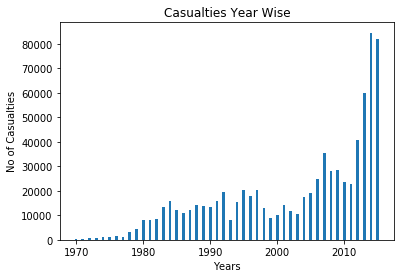

In [11]:
# Lets Plot this in form of a bar chart
from matplotlib import pyplot as plt
plt.bar(data['iyear'], data['Casualties'], width= 0.4)
plt.xlabel('Years')
plt.ylabel('No of Casualties')
plt.title('Casualties Year Wise')
plt.show()

# -------End of problem statement 1--------------------

# Are certain nationalities more targeted? If yes, which one?

In [62]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["natlty1_txt"]
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [63]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,natlty1_txt
0,Dominican Republic
1,Belgium
2,United States
3,United States
4,United States


In [64]:
data=data.fillna(0)

In [65]:
data=pd.crosstab(index=data['natlty1_txt'],columns='count').reset_index()
data=data.sort_values(by='count',ascending=False)
data.head()

col_0,natlty1_txt,count
87,Iraq,18284
141,Pakistan,12326
83,India,10106
1,Afghanistan,8235
37,Colombia,7716


# -------End of problem statement 2--------------------

# Are some countries better at defending themselves against terrorist attacks? If yes, which is the safest country to live

# Approach-1

In [161]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["country_txt","success","nkill",'nwound']
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [162]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,country_txt,success,nkill,nwound
0,Dominican Republic,1.0,1.0,0.0
1,Mexico,1.0,0.0,0.0
2,Philippines,1.0,1.0,0.0
3,Greece,1.0,NaN,NaN
4,Japan,1.0,NaN,NaN


In [167]:
data.fillna(0).head()

,country_txt,success,nkill,nwound
0,Dominican Republic,1.0,1.0,0.0
1,Mexico,1.0,0.0,0.0
2,Philippines,1.0,1.0,0.0
3,Greece,1.0,0.0,0.0
4,Japan,1.0,0.0,0.0


In [164]:
safe=data.groupby('country_txt').count().reset_index()
safe_country=safe.sort_values(by='success').head(12)

In [165]:
list(data)

['country_txt', 'success', 'nkill', 'nwound']

In [166]:
safe1=data[data['country_txt'].isin(safe_country['country_txt'])]
s2=safe1[safe1['success']==0]
s2

,country_txt,success,nkill,nwound
13445,Vatican City,0.0,0.0,3.0
33661,Gibraltar,0.0,3.0,0.0
2190,Brunei,0.0,0.0,1.0


# Approach-2`

In [101]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["country_txt","success","attacktype1_txt"]
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [102]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,country_txt,success,attacktype1_txt
0,Dominican Republic,1.0,Assassination
1,Mexico,1.0,Hostage Taking (Kidnapping)
2,Philippines,1.0,Assassination
3,Greece,1.0,Bombing/Explosion
4,Japan,1.0,Facility/Infrastructure Attack


In [103]:
data=data[data['success']==0]

In [104]:
data.head()

,country_txt,success,attacktype1_txt
6,Uruguay,0.0,Assassination
10,United States,0.0,Bombing/Explosion
23,United States,0.0,Bombing/Explosion
39,Philippines,0.0,Unknown
43,United States,0.0,Facility/Infrastructure Attack


In [105]:
data1=data.groupby(['country_txt','attacktype1_txt'])['success'].count().reset_index()

In [106]:
data1=data1.rename(columns={'country_txt':'Country','attacktype1_txt':'Attack type','success':'Successfully Defended'})

In [107]:
data1=data1.sort_values(by='Successfully Defended',ascending=True)

In [110]:
list(data1)

['Country', 'Attack type', 'Successfully Defended']

In [108]:
def incident_wise(data1):
    if data1['Successfully Defended']>250:
        return 'High'
    elif (data1['Successfully Defended']<250) & (data1['Successfully Defended']>100):
        return 'Medium'
    else:
        return 'Low'

In [112]:
datanew = pd.DataFrame()
for index,row in data1.iterrows():
    x=incident_wise(row)
    curr_row={'Country':row['Country'],'Count':row['Successfully Defended'],'Group':x}
    datanew=datanew.append(curr_row,ignore_index=True)

datanew.head()

,Count,Country,Group
0,1.0,Great Britain,Low
1,1.0,Philippines,Low
2,1.0,Poland,Low
3,1.0,Thailand,Low
4,1.0,Kazakhstan,Low


In [118]:
datanew.sort_values(by='Count',ascending=False).head()

,Count,Country,Group
661,925.0,Pakistan,High
660,844.0,India,High
659,666.0,Iraq,High
658,563.0,United Kingdom,High
657,518.0,Iraq,High


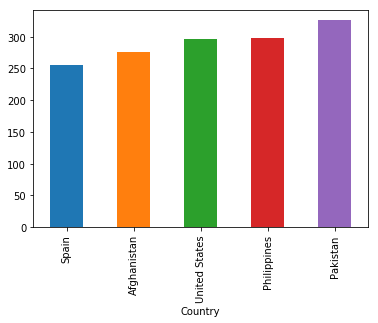

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
high=datanew[datanew["Group"]=='High'].head()
high.plot(x='Country',y='Count',kind='bar',legend=None)

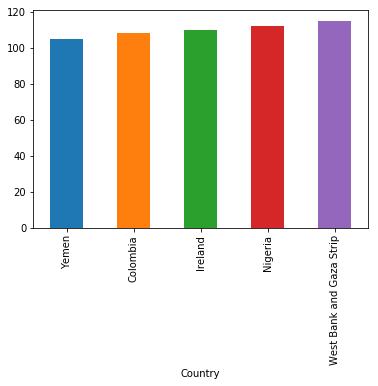

In [183]:
Medium=datanew[datanew["Group"]=='Medium'].head()


import matplotlib.pyplot as plt
%matplotlib inline
Medium=datanew[datanew["Group"]=='Medium'].head()
Medium.plot(x='Country',y='Count',kind='bar',legend=None)

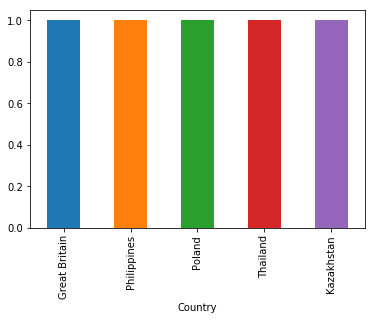

In [180]:
Low=datanew[datanew["Group"]=='Low'].head()
import matplotlib.pyplot as plt
%matplotlib inline
Low=datanew[datanew["Group"]=='Low'].head()
Low.plot(x='Country',y='Count',kind='bar',legend=None)


# -------End of problem statement 3--------------------

# Terror attack pattern in United States vs Russian Federation/USSR in last 45 years

In [2]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["country_txt",'iyear','eventid']
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [3]:
data=data_12to15.append(data_70to91).append(data_92to11).append(data_93)
data.head()

,eventid,iyear,country_txt
0,201201010001,2012,Pakistan
1,201201010002,2012,Kenya
2,201201010003,2012,Pakistan
3,201201010004,2012,Kenya
4,201201010005,2012,Pakistan


In [4]:
Usa=data[data['country_txt']=='United States']
Usa.head()

,eventid,iyear,country_txt
16,201201010020,2012,United States
55,201201030019,2012,United States
56,201201030020,2012,United States
57,201201030021,2012,United States
58,201201030022,2012,United States


In [194]:
Usa1=Usa.groupby('iyear')['eventid'].count().reset_index()
Usa1.head()

,iyear,eventid
0,1970,468
1,1971,247
2,1972,64
3,1973,58
4,1974,94


In [196]:
Russia=data[data['country_txt']=='Russia']
Russia.append(data[data['country_txt']=='Soviet Union'])
Russia.head()

,eventid,iyear,country_txt
74,201201030043,2012,Russia
75,201201030044,2012,Russia
106,201201040035,2012,Russia
210,201201080029,2012,Russia
229,201201090024,2012,Russia


In [200]:
Russia1=Russia.groupby('iyear')['eventid'].count().reset_index()
Russia1.head()

,iyear,eventid
0,1992,21
1,1993,4
2,1994,47
3,1995,37
4,1996,66


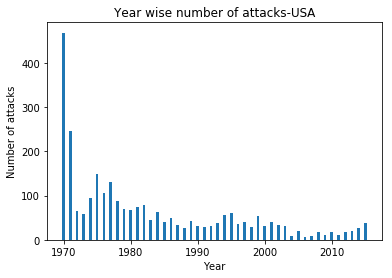

In [198]:
#USA Attack Plot
import matplotlib
from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[10,10]
%matplotlib inline
plt.bar(Usa1['iyear'],Usa1['eventid'],width=0.4)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Year wise number of attacks-USA')
plt.show()

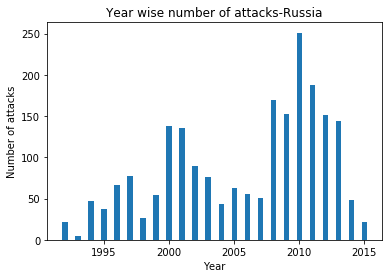

In [201]:
#USA Attack Plot
import matplotlib
from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[10,10]
%matplotlib inline
plt.bar(Russia1['iyear'],Russia1['eventid'],width=0.4)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Year wise number of attacks-Russia')
plt.show()

# -------End of problem statement 4--------------------

# Terrorist attack in India and Pakistan in last 45 years

In [61]:
gtd1993=pd.read_csv('gtd1993_748.csv',encoding='ISO-8859–1')
gtd1215=pd.read_csv('gtd_12to15_52134.csv',encoding='ISO-8859–1',low_memory=False)
gtd7091=pd.read_csv('gtd_70to91_49566.csv',encoding='ISO-8859–1',low_memory=False)
gtd9211=pd.read_csv('gtd_92to11_no 93_55072.csv',encoding='ISO-8859–1',low_memory=False)

In [62]:
india=gtd1993[gtd1993['country_txt']=='India']

In [63]:
india=india.append(gtd1215[gtd1215['country_txt']=='India'],sort=False)

In [64]:
india=india.append(gtd7091[gtd7091['country_txt']=='India'],sort=False)

In [65]:
india=india.append(gtd9211[gtd9211['country_txt']=='India'],sort=False)

In [66]:
india.drop_duplicates().head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,targsubtype3,targsubtype3_txt,ingroup,ingroup2,ingroup3,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
53,199301220005,1993,1,22,NaN,1,1/23/93,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,199301260001,1993,1,26,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,199301300003,1993,1,30,NaN,1,2/21/93,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,199303120002,1993,3,12,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,199303120003,1993,3,12,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
len(india)

9982

In [68]:
pak=gtd1993[gtd1993['country_txt']=='Pakistan']

In [69]:
pak=pak.append(gtd1215[gtd1215['country_txt']=='Pakistan'],sort=False)

In [70]:
pak=pak.append(gtd7091[gtd7091['country_txt']=='Pakistan'],sort=False)

In [71]:
pak=pak.append(gtd9211[gtd9211['country_txt']=='Pakistan'],sort=False)

In [72]:
len(pak)

12776

In [73]:
pak=pak.drop_duplicates()

In [74]:
india=india.groupby('iyear')['eventid'].count().reset_index()

In [75]:
india.head()

,iyear,eventid
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,20


In [76]:
len(india)

41

In [103]:
india.head()

,iyear,eventid
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,20


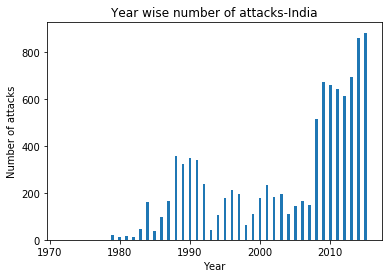

In [79]:
import matplotlib
from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[10,10]
%matplotlib inline
plt.bar(india['iyear'],india['eventid'],width=0.4)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Year wise number of attacks-India')

plt.show()

In [80]:
pak=pak.groupby('iyear')['eventid'].count().reset_index()

In [81]:
pak.head()

,iyear,eventid
0,1970,1
1,1974,2
2,1975,2
3,1976,3
4,1978,2


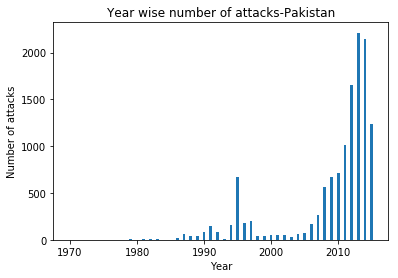

In [82]:
from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[20,20]
%matplotlib inline
plt.bar(pak['iyear'],pak['eventid'],width=0.4)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Year wise number of attacks-Pakistan')
plt.show()

# -------End of problem statement 5--------------------

# Heaviest hit Target types (Based on both Killed and wounded)

In [173]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["targtype1_txt","eventid"]
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [174]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,eventid,targtype1_txt
0,197000000001,Private Citizens & Property
1,197000000002,Government (Diplomatic)
2,197001000001,Journalists & Media
3,197001000002,Government (Diplomatic)
4,197001000003,Government (Diplomatic)


In [175]:
data=data.groupby('targtype1_txt')['eventid'].count().reset_index()
data.sort_values(by='eventid',ascending=False).head()

,targtype1_txt,eventid
14,Private Citizens & Property,36076
10,Military,23036
13,Police,21285
7,Government (General),19334
3,Business,18959


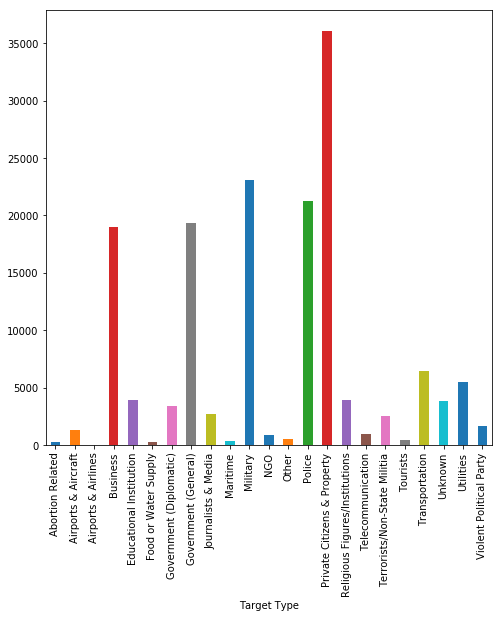

In [189]:
data=data.rename(columns={'targtype1_txt':'Target Type','eventid':'Number of incidents'})
plt.rcParams['figure.figsize']=[8,8]
data.plot(x='Target Type',y='Number of incidents',kind='bar',legend=None)

# -------End of problem statement 6--------------------

In [36]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\Data Sets\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=['provstate',"attacktype1","attacktype1_txt",'targtype1_txt']
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 29: invalid start byte

In [30]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,attacktype1,attacktype1_txt,targtype1_txt
0,1,Assassination,Private Citizens & Property
1,6,Hostage Taking (Kidnapping),Government (Diplomatic)
2,1,Assassination,Journalists & Media
3,3,Bombing/Explosion,Government (Diplomatic)
4,7,Facility/Infrastructure Attack,Government (Diplomatic)


In [31]:
kidnapping = data[data['attacktype1_txt']=='Hostage Taking (Kidnapping)']
kidnapping.head()

,attacktype1,attacktype1_txt,targtype1_txt
1,6,Hostage Taking (Kidnapping),Government (Diplomatic)
27,6,Hostage Taking (Kidnapping),Business
103,6,Hostage Taking (Kidnapping),Government (General)
112,6,Hostage Taking (Kidnapping),Government (Diplomatic)
123,6,Hostage Taking (Kidnapping),Government (Diplomatic)


In [32]:
kid = kidnapping.groupby('targtype1_txt')['attacktype1_txt'].count().reset_index()
final = kid.sort_values(by='attacktype1_txt',ascending = False)
final

,targtype1_txt,attacktype1_txt
14,Private Citizens & Property,3071
7,Government (General),1421
3,Business,1420
13,Police,570
10,Military,568
8,Journalists & Media,424
4,Educational Institution,304
6,Government (Diplomatic),304
11,NGO,270
15,Religious Figures/Institutions,219
